# Importing Libraries

In [65]:
# Importing all neccesary libraries
import math # Maths
import pandas as pd # Pandas
import numpy as np # Numpy
import matplotlib.pyplot as plt # Matplotlib - for ploting
from matplotlib.ticker import MultipleLocator # Matplotlib - for defining axis spacing
import quandl # Importing quandl Library 
import tabulate # Importing library for table presentation

# Importing Data

In [66]:
gdp_df = pd.read_csv("GDP_pc_USD.csv") # Importing GDP data for all countries
uw_prev_df = pd.read_csv("Prevalence_of_underweight_weight_for_age.csv") # Importing GDP data for all countries
country_metadata_df = pd.read_csv("Metadata_region_income_level.csv") # Importing metadata 
co2e_df = pd.read_csv("CO2_emissions.csv") # Importing emission data
school_enrolment_df = pd.read_csv("school_enrollment.csv") # Importing emission data
fert_rate_df = pd.read_csv("fertility_rate.csv") # Importing fertility data
hpi_df = pd.read_excel('hpi-data-2016.xlsx', sheet_name =  "Rank order", skiprows=6) # Importing the happy planet index data
cpi_df = pd.read_excel('CPI2016_Results.xlsx', sheet_name =  "CPI 2015-2016") # Importing the corruption perception index


C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Conditional Formatting extension is not supported and will be removed
  for idx, row in parser.parse():


# Question 1

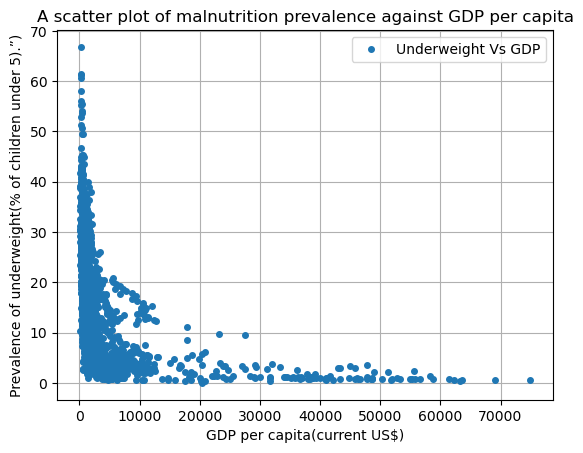

In [67]:
country_list = gdp_df["Country Code"].tolist() # Extracting country code to list

gdp_list = [] # creating a list to store gdp data
uw_prev_list = [] # Creating a list tp store under weigh prevelence data

years = [str(year) for year in range(1960, 2024)] # Specifying the years fields

for index, row in gdp_df.iterrows(): # Looping through data frame
        gdp_list.extend(row[year] for year in years) # Addign extracted data to gdp list
for index, row in uw_prev_df.iterrows(): # Looping through data frame
        uw_prev_list.extend(row[year] for year in years) # Addign extracted data to uw_preve list

# Plotting data and labeling graph with ledgend 
fig, ax = plt.subplots() # Creating subplot to introduce legends
plt.plot(gdp_list, uw_prev_list,  "o", markersize = 4, label = "Underweight Vs GDP") # PlotS
plt.xlabel('GDP per capita(current US$)') # X-Axis label
plt.ylabel('Prevalence of underweight(% of children under 5).”)') # Y-Axis label
plt.title("A scatter plot of malnutrition prevalence against GDP per capita")
plt.grid(True) # Display grid
ax.legend() # Displaying ledgend

# Rough work
#uw_prev_df.head()
# x = gdp_df.iloc[:, 4:]
# y = uw_prev_df.iloc[:, 4:]
# #plt.scatter(x,y)
# #plt.show()

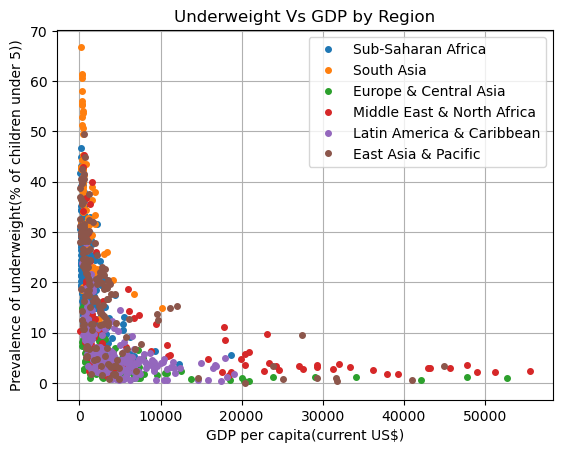

In [68]:
#country_metadata_df.head()

# Extracting country code from meta data and grouping by region 
# Grouping code for Sub-Saharan African region
SSA_df = country_metadata_df[country_metadata_df['Region'] == 'Sub-Saharan Africa'] 
CC_SSA_list = SSA_df['Country Code'].tolist()

# Grouping code for South Asian Region
SA_df = country_metadata_df[country_metadata_df['Region'] == 'South Asia']
CC_SA_list = SA_df['Country Code'].tolist()

# Grouping code for Europe & Central Asian region
ECA_df = country_metadata_df[country_metadata_df['Region'] == 'Europe & Central Asia']
CC_ECA_list = ECA_df['Country Code'].tolist()

# Grouping code for Middle East & North African region
MENA_df = country_metadata_df[country_metadata_df['Region'] == 'Middle East & North Africa']
CC_MENA_list = MENA_df['Country Code'].tolist()

# Grouping code for Latin America & Caribbean region
LAC_df = country_metadata_df[country_metadata_df['Region'] == 'Latin America & Caribbean']
CC_LAC_list = LAC_df['Country Code'].tolist()

# Grouping code for East Asia & Pacific region
EAP_df = country_metadata_df[country_metadata_df['Region'] == 'East Asia & Pacific']
CC_EAP_list = EAP_df['Country Code'].tolist()

# Extracting GDP data of each specific regions
GDP_SSA_df = gdp_df[gdp_df['Country Code'].isin(CC_SSA_list)] # SSA region
GDP_SA_df = gdp_df[gdp_df['Country Code'].isin(CC_SA_list)] # SA region
GDP_ECA_df = gdp_df[gdp_df['Country Code'].isin(CC_ECA_list)] # ECA region
GDP_MENA_df = gdp_df[gdp_df['Country Code'].isin(CC_MENA_list)] # MENA region
GDP_LAC_df = gdp_df[gdp_df['Country Code'].isin(CC_LAC_list)] # LAC region
GDP_EAP_df = gdp_df[gdp_df['Country Code'].isin(CC_EAP_list)] # EAP region

# Extracting Underweight prevelence data of each specific regions
uw_prev_SSA_df = uw_prev_df[gdp_df['Country Code'].isin(CC_SSA_list)] # SSA region
uw_prev_SA_df = uw_prev_df[gdp_df['Country Code'].isin(CC_SA_list)] # SA region
uw_prev_ECA_df = uw_prev_df[gdp_df['Country Code'].isin(CC_ECA_list)] # ECA region
uw_prev_MENA_df = uw_prev_df[gdp_df['Country Code'].isin(CC_MENA_list)] # MEAN region
uw_prev_LAC_df = uw_prev_df[gdp_df['Country Code'].isin(CC_LAC_list)] # LAC region
uw_prev_EAP_df = uw_prev_df[gdp_df['Country Code'].isin(CC_EAP_list)] # EAP region
 
# Rough work
# for index, row in GDP_MENA_df.iterrows():
#         GDP_MENA_list.extend(row[year] for year in years)
# for index, row in uw_prev_MENA_df.iterrows():
#         uw_prev_MENA_list.extend(row[year] for year in years)

# Extractracting values to list from year's column per region
# SSA Region
GDP_SSA_list = gdp_df[gdp_df['Country Code'].isin(CC_SSA_list)][years].values.flatten()
uw_prev_SSA_list = uw_prev_df[uw_prev_df['Country Code'].isin(CC_SSA_list)][years].values.flatten()

# SA Region
GDP_SA_list = gdp_df[gdp_df['Country Code'].isin(CC_SA_list)][years].values.flatten()
uw_prev_SA_list = uw_prev_df[uw_prev_df['Country Code'].isin(CC_SA_list)][years].values.flatten()

# ECA Region
GDP_ECA_list = gdp_df[gdp_df['Country Code'].isin(CC_ECA_list)][years].values.flatten()
uw_prev_ECA_list = uw_prev_df[uw_prev_df['Country Code'].isin(CC_ECA_list)][years].values.flatten()

# MENA Region
GDP_MENA_list = gdp_df[gdp_df['Country Code'].isin(CC_MENA_list)][years].values.flatten()
uw_prev_MENA_list = uw_prev_df[uw_prev_df['Country Code'].isin(CC_MENA_list)][years].values.flatten()

# LAC Region
GDP_LAC_list = gdp_df[gdp_df['Country Code'].isin(CC_LAC_list)][years].values.flatten()
uw_prev_LAC_list = uw_prev_df[uw_prev_df['Country Code'].isin(CC_LAC_list)][years].values.flatten()

# EAP Region
GDP_EAP_list = gdp_df[gdp_df['Country Code'].isin(CC_EAP_list)][years].values.flatten()
uw_prev_EAP_list = uw_prev_df[uw_prev_df['Country Code'].isin(CC_EAP_list)][years].values.flatten()

#print(gdp_list)

# Ploting data  
fig, ax = plt.subplots() # Creating subplot to introduce legends
plt.plot(GDP_SSA_list, uw_prev_SSA_list, "o", markersize = 4, label = "Sub-Saharan Africa") # Plot Underweight vs GDP prevelence in Sub-Saharan Africa
plt.plot(GDP_SA_list, uw_prev_SA_list, "o", markersize = 4, label = "South Asia")# Plot Underweight vs GDP prevelence in South Asia
plt.plot(GDP_ECA_list, uw_prev_ECA_list, "o", markersize = 4, label = "Europe & Central Asia")# Plot Underweight vs GDP prevelence in Europe & Central Asia
plt.plot(GDP_MENA_list, uw_prev_MENA_list, "o", markersize = 4, label = "Middle East & North Africa")# Plot Underweight vs GDP prevelence in Middle East & North Africa
plt.plot(GDP_LAC_list, uw_prev_LAC_list, "o", markersize = 4, label = "Latin America & Caribbean")# Plot Underweight vs GDP prevelence in Latin America & Caribbean
plt.plot(GDP_EAP_list, uw_prev_EAP_list, "o", markersize = 4, label = "East Asia & Pacific")# Plot Underweight vs GDP prevelence in East Asia & Pacific

# Labeling plots
plt.xlabel('GDP per capita(current US$)') # X-Axis label
plt.ylabel('Prevalence of underweight(% of children under 5))') # Y-Axis label
plt.title("Underweight Vs GDP by Region")
plt.grid(True) # Display grid
ax.legend() # Displaying ledgend

#GDP_SSA_df.head()
# Plot metrices against each other

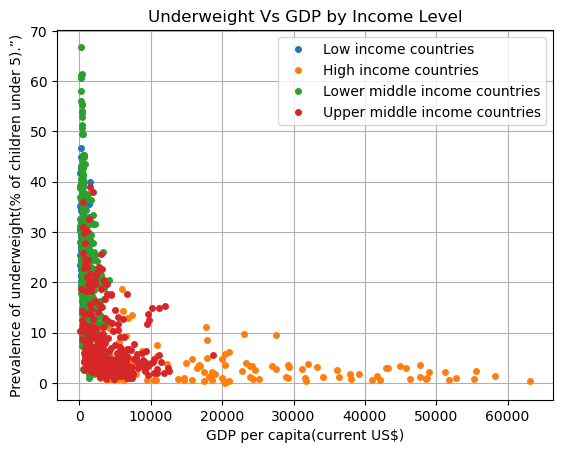

In [69]:
#country_metadata_df.head()

# Grouping code for High income region
HI_df = country_metadata_df[country_metadata_df['IncomeGroup'] == 'High income'] 
CC_HI_list = HI_df['Country Code'].tolist()

# Grouping code for Low income region
LI_df = country_metadata_df[country_metadata_df['IncomeGroup'] == 'Low income']
CC_LI_list = LI_df['Country Code'].tolist()

# Grouping code for Lower middel region
LMI_df = country_metadata_df[country_metadata_df['IncomeGroup'] == 'Lower middle income']
CC_LMI_list = LMI_df['Country Code'].tolist()

# Grouping code for Upper middle region
UMI_df = country_metadata_df[country_metadata_df['IncomeGroup'] == 'Upper middle income']
CC_UMI_list = UMI_df['Country Code'].tolist()

# Extracting GDP data of each specific regions
GDP_LI_df = gdp_df[gdp_df['Country Code'].isin(CC_LI_list)] # LI region
GDP_HI_df = gdp_df[gdp_df['Country Code'].isin(CC_HI_list)] # HI region
GDP_LMI_df = gdp_df[gdp_df['Country Code'].isin(CC_LMI_list)] # LMI region
GDP_UMI_df = gdp_df[gdp_df['Country Code'].isin(CC_UMI_list)] # HMI region

# Extracting Underweight prevelence data of each specific regions
uw_prev_LI_df = uw_prev_df[gdp_df['Country Code'].isin(CC_LI_list)] # LI region
uw_prev_HI_df = uw_prev_df[gdp_df['Country Code'].isin(CC_HI_list)] # HI region
uw_prev_LMI_df = uw_prev_df[gdp_df['Country Code'].isin(CC_LMI_list)] # LMI region
uw_prev_UMI_df = uw_prev_df[gdp_df['Country Code'].isin(CC_UMI_list)] # UMI region

# Extractracting values to list from year's column per income level region
# LI region
GDP_LI_list = gdp_df[gdp_df['Country Code'].isin(CC_LI_list)][years].values.flatten()
uw_prev_LI_list = uw_prev_df[uw_prev_df['Country Code'].isin(CC_LI_list)][years].values.flatten()

# HI region
GDP_HI_list = gdp_df[gdp_df['Country Code'].isin(CC_HI_list)][years].values.flatten()
uw_prev_HI_list = uw_prev_df[uw_prev_df['Country Code'].isin(CC_HI_list)][years].values.flatten()

# LMI region
GDP_LMI_list = gdp_df[gdp_df['Country Code'].isin(CC_LMI_list)][years].values.flatten()
uw_prev_LMI_list = uw_prev_df[uw_prev_df['Country Code'].isin(CC_LMI_list)][years].values.flatten()

# HMI region
GDP_UMI_list = gdp_df[gdp_df['Country Code'].isin(CC_UMI_list)][years].values.flatten()
uw_prev_UMI_list = uw_prev_df[uw_prev_df['Country Code'].isin(CC_UMI_list)][years].values.flatten()

# Ploting data 
fig, ax = plt.subplots() # Creating subplot to introduce legends
plt.plot(GDP_LI_list, uw_prev_LI_list, "o", markersize = 4, label = "Low income countries") # Plot Underweight vs GDP prevelence in low income countries
plt.plot(GDP_HI_list, uw_prev_HI_list, "o", markersize = 4, label = "High income countries")# Plot Underweight vs GDP prevelence in high income countries 
plt.plot(GDP_LMI_list, uw_prev_LMI_list, "o", markersize = 4, label = "Lower middle income countries")# Plot Underweight vs GDP prevelence in lomer middle income countries
plt.plot(GDP_UMI_list, uw_prev_UMI_list, "o", markersize = 4, label = "Upper middle income countries")# Plot Underweight vs GDP prevelence in upper middle income countries 

# Labelling plot
plt.xlabel('GDP per capita(current US$)') # X-Axis label
plt.ylabel('Prevalence of underweight(% of children under 5).”)') # Y-Axis label
plt.title("Underweight Vs GDP by Income Level") # Graph Title 
plt.grid(True) # Display grid
ax.legend() # Displaying ledgend

# Plot matices against each other
# GDP_SSA_df.head()
# print(CC_LI_list)

# Question 2

In [70]:
# # API key 
# api_key = "xLAF5wmPb-YVwo4PyMcw"

# # Importing data from quandl API
# wheat_data = quandl.get("COM/PWHEAMT_USD") # wheat data
# crude_oil_data = quandl.get('WGEC/WLD_CRUDE_WTI') # crude oil data
# gold_data = quandl.get('BUNDESBANK/BBK01_WT5511') # gold data

# Helpful resource: https://algotrading101.com/learn/quandl-guide/

In [71]:
wheat_df = pd.read_csv('wheat.csv')
crude_oil_df = pd.read_csv('crude-oil.csv')
gold_df = pd.read_csv('gold.csv')

prices_df = wheat_df.merge(crude_oil_df, on = ['Date'])
prices_df = prices_df.merge(gold_df, on = ['Date'])
prices_df = prices_df.rename(columns={'Value': 'Gold Price', 'Value_y': 'Crude Oil Price', 'Value_x': 'Wheat Price'})
#prices_df = pd.merge([wheat_df, crude_oil_df, gold_df], axis='Date', join='inner')


#wheat_df.head()
prices_df.head()

,Date,Wheat Price,Crude Oil Price,Gold Price
0,1980-12-31,182.616028,0.000000,589.5
1,1981-12-31,176.002167,0.000000,400.0
2,1982-12-31,159.834961,32.766667,448.0
3,1984-12-31,149.546738,29.377500,309.0
4,1985-12-31,137.053879,27.762500,327.0


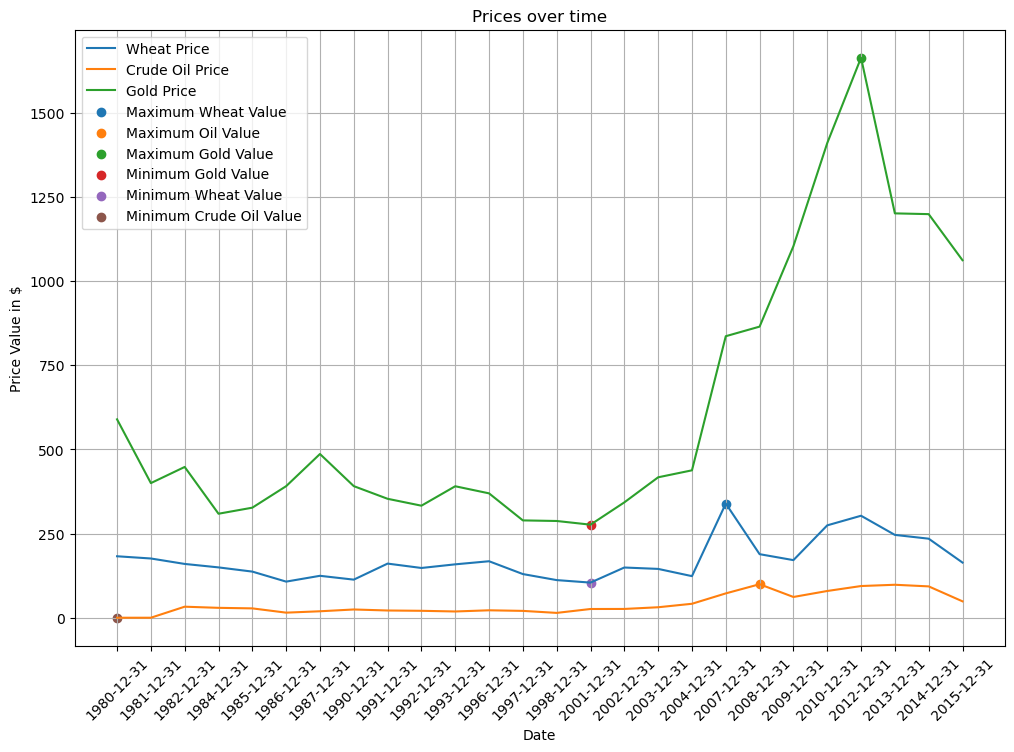

In [72]:
# # Renaming columns 
# wheat_data = wheat_data.rename(columns={'Value': 'Wheat Price'})
# crude_oil_data = crude_oil_data.rename(columns={'Value': 'Crude Oil Price'})
# gold_data = gold_data.rename(columns={'Value': 'Gold Price'})

# #Merging data using inner joints
# prices_df = pd.concat([wheat_data, crude_oil_data, gold_data], axis=1, join='inner')

# Ploting values agains dates 
plt.figure(figsize=(12,8))

plt.plot(prices_df['Date'], prices_df['Wheat Price'], label='Wheat Price')
plt.plot(prices_df['Date'], prices_df['Crude Oil Price'], label='Crude Oil Price')
plt.plot(prices_df['Date'], prices_df['Gold Price'], label='Gold Price')

# Reseting index to make Date a column on its own.
#prices_df = prices_df.reset_index()

# Extract the max wheat value and corresponding date
max_wheat_index = prices_df['Wheat Price'].idxmax()
max_wheat = prices_df.at[max_wheat_index, 'Wheat Price']
max_wheat_date = prices_df.at[max_wheat_index, 'Date']

# Extract the max crude oil value and corresponding date
max_oil_index = prices_df['Crude Oil Price'].idxmax()
max_oil = prices_df.at[max_oil_index, 'Crude Oil Price']
max_oil_date = prices_df.at[max_oil_index, 'Date']

# Extract the max crude oil value and corresponding date
max_gold_index = prices_df['Gold Price'].idxmax()
max_gold = prices_df.at[max_gold_index, 'Gold Price']
max_gold_date = prices_df.at[max_gold_index, 'Date']

# Scatter plot of Maximum values
plt.scatter(max_wheat_date, max_wheat, label='Maximum Wheat Value')
plt.scatter(max_oil_date, max_oil, label='Maximum Oil Value')
plt.scatter(max_gold_date, max_gold, label='Maximum Gold Value')

# Scatter plot of Minimum values with in-line extraction
plt.scatter(prices_df.at[prices_df['Gold Price'].idxmin(), 'Date'], prices_df.at[prices_df['Gold Price'].idxmin(), 'Gold Price'], label='Minimum Gold Value')
plt.scatter(prices_df.at[prices_df['Wheat Price'].idxmin(), 'Date'], prices_df.at[prices_df['Wheat Price'].idxmin(), 'Wheat Price'], label='Minimum Wheat Value')
plt.scatter(prices_df.at[prices_df['Crude Oil Price'].idxmin(), 'Date'], prices_df.at[prices_df['Crude Oil Price'].idxmin(), 'Crude Oil Price'], label='Minimum Crude Oil Value')

# Labelling plot
plt.xlabel('Date') # X-Axis label
plt.xticks(rotation=45)
plt.ylabel('Price Value in $') # Y-Axis label
plt.title("Prices over time") # Graph Title 
plt.grid(True) # Display grid
plt.legend()

#print(prices_df['Date'], max(prices_df['Wheat Price']))
#plt.plot(max(prices_df['Wheat Price']))
#prices_df.head()
#plt.plot(prices_df)

# Question 3

In [73]:
# Extracting just neccessary fields
co2e_df = co2e_df[["Country Code", "2010"]] 

# Creating a table with headers and values using the built-in mean, median, std, quantile functions
stats_summery = [["Statistics", "Mean", "Median", "Standard Deviation", "5th Percentile", "25th Percentile", "75th Percentile", "95th Percentile"],
    ["2010 Summary Statistics:", co2e_df["2010"].mean(), co2e_df["2010"].median(), co2e_df["2010"].std(), co2e_df["2010"].quantile(0.05),co2e_df["2010"].quantile(0.25),co2e_df["2010"].quantile(0.75),co2e_df["2010"].quantile(0.95),],]

# Presenting the table using the tabulate
stats_summery_table = tabulate.tabulate(stats_summery, headers="firstrow", tablefmt="grid") # Choosing header and table format
print(stats_summery_table) # Printing table 

+--------------------------+--------+----------+----------------------+------------------+-------------------+-------------------+-------------------+
| Statistics               |   Mean |   Median |   Standard Deviation |   5th Percentile |   25th Percentile |   75th Percentile |   95th Percentile |
+==========================+========+==========+======================+==================+===================+===================+===================+
| 2010 Summary Statistics: | 4.4076 |  2.66714 |              5.16505 |          0.11486 |          0.756011 |           6.20007 |            15.172 |
+--------------------------+--------+----------+----------------------+------------------+-------------------+-------------------+-------------------+


In [74]:
# Extracting just neccessary fields
school_enrolment_df = school_enrolment_df[["Country Code", "2010"]]

# Creating a table with headers and values using the built-in mean, median, std, quantile functions
stats_summery_school_enrolment = [["Statistics", "Mean", "Median", "Standard Deviation", "5th Percentile", "25th Percentile", "75th Percentile", "95th Percentile"],
    ["2010 Stat Summary", school_enrolment_df["2010"].mean(), school_enrolment_df["2010"].median(), school_enrolment_df["2010"].std(), school_enrolment_df["2010"].quantile(0.05),school_enrolment_df["2010"].quantile(0.25),school_enrolment_df["2010"].quantile(0.75),school_enrolment_df["2010"].quantile(0.95),],]

# Presenting the table using the tabulate
stats_summery_table = tabulate.tabulate(stats_summery_school_enrolment, headers="firstrow", tablefmt="grid") # Defining header and table format
print(stats_summery_table) # Printing table

+-------------------+---------+----------+----------------------+------------------+-------------------+-------------------+-------------------+
| Statistics        |    Mean |   Median |   Standard Deviation |   5th Percentile |   25th Percentile |   75th Percentile |   95th Percentile |
+===================+=========+==========+======================+==================+===================+===================+===================+
| 2010 Stat Summary | 90.1051 |  92.9567 |              9.52763 |          66.6568 |            87.801 |           95.9344 |           98.8728 |
+-------------------+---------+----------+----------------------+------------------+-------------------+-------------------+-------------------+


# Question 4

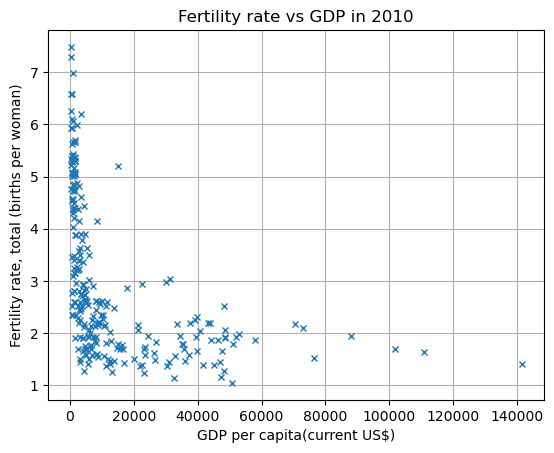

In [75]:
fert_rate_2010_df = fert_rate_df[["Country Code", "2010"]]
gdp_2010_df = gdp_df[["Country Code", "2010"]]

fert_rate_2010_list = fert_rate_2010_df["2010"]
gdp_2010_list = gdp_2010_df["2010"]

#print(gdp_list)
plt.plot(gdp_2010_list, fert_rate_2010_list, "x", markersize = 4, label = "Fertility rate, total (births per woman)") # PlotS
plt.ylabel('Fertility rate, total (births per woman)') # Y-Axis label
plt.xlabel('GDP per capita(current US$)') # X-Axis label
plt.title('Fertility rate vs GDP in 2010') # Title
plt.grid(True) # Display grid
ax.legend() # Displaying ledgend

#print(len(fert_rate_2010_list), len(gdp_2010_list))

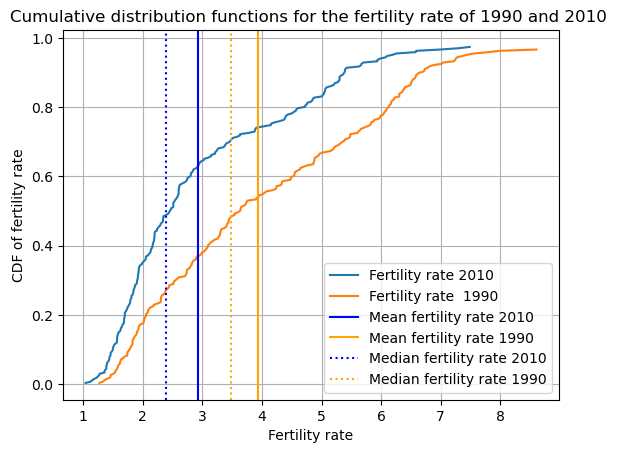

In [76]:
fert_rate_2010_list_sorted = np.sort(fert_rate_2010_df["2010"]).tolist()
fert_rate_1990_list_sorted = np.sort(fert_rate_df["1990"]).tolist()

fig, ax = plt.subplots() # Creating subplot to introduce legends

fert_rate_cdf = np.arange(1, len(fert_rate_2010_list_sorted) + 1)/len(fert_rate_2010_list_sorted)
plt.plot(fert_rate_2010_list_sorted, fert_rate_cdf, label = "Fertility rate 2010") # PlotS
plt.plot(fert_rate_1990_list_sorted, fert_rate_cdf, label = "Fertility rate  1990") # PlotS
plt.axvline(x=fert_rate_2010_df["2010"].mean(), color='b', label='Mean fertility rate 2010')
plt.axvline(fert_rate_df["1990"].mean(), color='orange', label='Mean fertility rate 1990')
plt.axvline(x=fert_rate_2010_df["2010"].median(), color='b', label='Median fertility rate 2010', linestyle='dotted')
plt.axvline(fert_rate_df["1990"].median(), color='orange', label='Median fertility rate 1990', linestyle='dotted')


plt.ylabel('CDF of fertility rate') # Y-Axis label
plt.xlabel('Fertility rate') # X-Axis label
plt.title('Cumulative distribution functions for the fertility rate of 1990 and 2010 ') # Title
plt.grid(True) # Display grid
ax.legend()
#plt.plot(:,fert_rate_2010_df["2010"].mean())


# Question 5

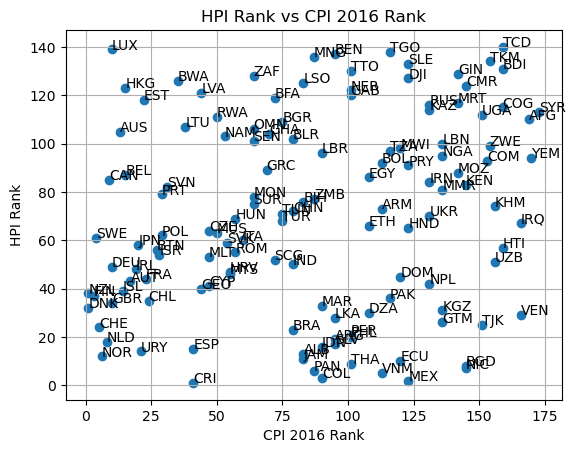

In [77]:
# Extracting neccessary fields from the Happy Planet Index and the Corruption Perceptions Index
hpi_df = hpi_df[['Country', 'HPI Rank']]
cpi_df = cpi_df[['Country', 'WB Code', 'CPI 2016 Rank']]

# Filtering countries with data in both index
cpi_df = cpi_df[cpi_df['Country'].isin(hpi_df['Country'])]
cpi_df = cpi_df.sort_values(by='Country')
hpi_df = hpi_df[hpi_df['Country'].isin(cpi_df['Country'])]
hpi_df = hpi_df.sort_values(by='Country')

# Performing an inner join of data
merged_df = pd.merge(cpi_df[['Country','WB Code','CPI 2016 Rank']],hpi_df[['Country','HPI Rank']], on = 'Country', how = 'inner' )
plt.scatter(merged_df['CPI 2016 Rank'], merged_df['HPI Rank'])

# loop through rows and annotat CPI vs HPI points with the country code
for i, row in merged_df.iterrows():
    plt.annotate(row["WB Code"], (row['CPI 2016 Rank'], row['HPI Rank']))

plt.ylabel('HPI Rank') # Y-Axis label
plt.xlabel('CPI 2016 Rank') # X-Axis label
plt.title('HPI Rank vs CPI 2016 Rank') # Title
plt.grid(True) # Display grid

#merged_df.head()
#hpi_cpi_df.head()

# Use CPI 2016 Rank - CPI 2015/2016
#CPI 2016 Rank
# Use country code - use unique colors.